In [1]:
import pandas as pd
import numpy as np
import regex as re
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('AssessmentDataSept2022.csv', encoding='ISO-8859-1')
print(df.dtypes)

for (columnname, columndata) in df.items():
    print(columnname, columndata.isnull().sum())
    
#dropping the metrics with >40% missing entries
df.drop(columns=['longcamp','shortcamp','ohpr','ohll','dl','powl','powr','lhang','armjump','hipjump'], inplace=True)

age               int64
sex              object
max_boulder      object
max_sport        object
exp              object
trainexp         object
country          object
state            object
rock             object
season           object
days             object
height          float64
weight          float64
span            float64
pullup          float64
pushup          float64
continuous       object
maxhang         float64
weightedpull    float64
repeaters1      float64
longcamp        float64
shortcamp       float64
ohpr            float64
ohll            float64
dl              float64
sportgrade       object
bouldergrade     object
powl            float64
powr            float64
lhang           float64
armjump         float64
hipjump         float64
dtype: object
age 0
sex 3
max_boulder 4
max_sport 6
exp 4
trainexp 2
country 98
state 186
rock 31
season 14
days 26
height 4
weight 1
span 32
pullup 11
pushup 14
continuous 30
maxhang 30
weightedpull 22
repeaters1 62
longcamp 309
sh

In [2]:
#Data Cleaning
#convert sex to boolean values (0 as Male, 1 as Female)
df['sex']=df['sex'].str.replace('Male','0')
df['sex']=df['sex'].str.replace('Female','1')
df['sex']=df['sex'].str.replace('Other/Prefer to Not Answer','1')
df['sex']=df['sex'].str.replace('Other','1')
df['sex']=df['sex'].fillna(1)
df['sex']=df['sex'].astype('float')

#Clean and convert boulder and sport grades from string to float

df['max_boulder']=df['max_boulder'].str.replace('<V3','2', regex=True)
df['max_boulder']=df['max_boulder'].str.replace('\D*','', regex=True)
df['max_boulder']=df['max_boulder'].replace('',np.nan, regex=True)
df['max_boulder']=df['max_boulder'].astype('float', errors='ignore')

df['max_sport']=df['max_sport'].str.replace('5.','',regex=True)
df['max_sport']=df['max_sport'].str.replace('a/b','',regex=True)
df['max_sport']=df['max_sport'].str.replace('c/d','.5',regex=True)
df['max_sport']=df['max_sport'].str.replace('[a-zA-Z]','',regex=True)
df['max_sport']=df['max_sport'].str.replace('<10','9',regex=True)
df['max_sport']=df['max_sport'].replace(' ',np.nan, regex=True)
df['max_sport']=df['max_sport'].astype('float', errors='ignore')

#Clean and convert experience from string to float
df['exp']=df['exp'].str.extract(r'(\d+)')
df['exp']=df['exp'].fillna(0)
df['exp']=df['exp'].astype('float')

df['trainexp']=df['trainexp'].str.extract(r'(\d+)')
df['trainexp']=df['trainexp'].fillna(0)
df['trainexp']=df['trainexp'].astype('float')

#Clean and convert season from string to float
df['season']=df['season'].str.replace('Year round','12')
df['season']=df['season'].str.extract(r'(\d+)')
df['season']=df['season'].fillna(0)
df['season']=df['season'].astype('float')

#Clean Country and State
df['country']=df['country'].fillna('Unknown')
df['country']=(df['country'].str.lower()).str.strip()
df['country']= df['country'].apply(lambda x: 'united states' if 'usa' in x else x)
df['country']= df['country'].apply(lambda x: 'united states' if 'stat' in x else x)
df['country']=df['country'].replace('murica','united states')

mapping=[('murica','united states'),('deutschland','germany'),('türkiye','turkey'),('norge','norway'),('méxico','mexico'),('allemagne','germany'),('the netherlands','netherlands')]
for k,v in mapping:
    df['country']=df['country'].str.replace(k,v)
df['country']=df['country'].replace('us','united states')
df['country']=df['country'].replace('uk','united kingdom')


state_dict={
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    'Montana': "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

state_dict =  {k.lower(): v.lower() for k, v in state_dict.items()}

df['state']=df['state'].fillna('Unknown')
df['state']=(df['state'].str.lower()).str.strip()

df.replace({'state':state_dict}, inplace=True)
mapping=[('north carolin','nc'),('kansas :(','ks'),('british columbia','bc'), ('washington state','wa'),('las vegas nevada','nv'),('ohio (climb in kentucky)','oh'),('new york state','ny'),('dayton ohio', 'oh'),('ontario','on'),('-- por favor, seleccione --','unknown')]
for k,v in mapping:
    df['state']=df['state'].str.replace(k,v)
    
#clean and convert days froms string to float
mapping=[('3-4 days per month','36'), ('5-6 days per month','60'), ('1-5 days per month','24'),
 ('7-8 days per month','84'),('>15 days per month','180'), ('9-10 days per month','108'),('Every weekend day + 14-16 days','115')]
for k,v in mapping:
    df['days']=df['days'].str.replace(k,v)
df['days']=df['days'].str.extract(r'(\d+)')
df['days']=df['days'].fillna(0)
df['days']=df['days'].astype(float)

#clean and convert continuous from string to float
df['continuous']=df['continuous'].replace('I had to do 30mm - I could hang for 7s',0)
df['continuous']=df['continuous'].astype(float)

#replace missing height with median values by gender. replace missing span with height. add ape_index, weight:height column.

avg_female_height=df['height'].loc[df['sex']==1].mean()
avg_male_height=df['height'].loc[df['sex']==0].mean()
avg_female_weight=df['weight'].loc[df['sex']==1].mean()

df['height'].loc[df['sex']==1]=df['height'].loc[df['sex']==1].fillna(avg_female_height)
df['height'].loc[df['sex']==0]=df['height'].loc[df['sex']==0].fillna(avg_male_height)
df['weight'].loc[df['sex']==1]=df['weight'].loc[df['sex']==1].fillna(avg_female_weight)

df['height']=df['height'].replace(160, avg_male_height)
df['height']=df['height'].replace(111, avg_male_height)

df['span']=df['span'].fillna(df['height'])
df['span'].where(df['span']<100, df['height'], inplace=True)
df['span'].where(df['span']>50, df['height'], inplace=True)


df['ape_index']=df['span']-df['height']
df['weight:height']=df['weight']/df['height']

#drop bouldergrade, sportgrade columns, rename columns for clarity
df.drop(columns=['sportgrade','bouldergrade'], inplace=True)
df.rename(columns={'max_boulder':'max_boulder_Vgrade', 'max_sport':'max_sport_YDS', 'exp':'total_exp', 'trainexp':'train_exp',
      'rock':'rock_type', 'season':'outdoor_season_months', 'days':'outdoor_days','repeaters1':'repeaters'}, inplace=True)

df.fillna({'pullup':0,'pushup':0,'continuous':0,'maxhang':0,'weightedpull':0,'repeaters':0}, inplace=True)

/tmp/ipykernel_866213/2697848645.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['height'].loc[df['sex']==1]=df['height'].loc[df['sex']==1].fillna(avg_female_height)
/tmp/ipykernel_866213/2697848645.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['height'].loc[df['sex']==0]=df['height'].loc[df['sex']==0].fillna(avg_male_height)
/tmp/ipykernel_866213/2697848645.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['

In [3]:
#Exploratory Data Analysis
df.describe()

,age,sex,max_boulder_Vgrade,max_sport_YDS,total_exp,train_exp,outdoor_season_months,outdoor_days,height,weight,span,pullup,pushup,continuous,maxhang,weightedpull,repeaters,ape_index,weight:height
count,612.000000,612.000000,477.000000,458.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000
mean,33.416667,0.295752,7.025157,12.161572,6.933007,3.071895,6.308824,46.903595,68.409384,151.662100,69.493458,14.248366,28.119281,39.477108,52.743317,67.501471,105.449346,1.084074,2.209879
std,7.777254,0.456753,2.435598,0.912524,3.040440,2.662966,3.762732,37.912064,3.681388,22.854549,4.302578,7.068087,18.032535,20.411919,32.690213,35.260657,79.907551,2.005833,0.260024
min,16.000000,0.000000,2.000000,9.000000,0.000000,0.000000,0.000000,0.000000,57.000000,72.000000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11.000000,1.028571
25%,28.000000,0.000000,5.000000,12.000000,5.000000,1.000000,4.000000,20.000000,66.000000,135.750000,66.975000,10.000000,19.750000,26.000000,30.000000,45.000000,54.750000,0.000000,2.045455
50%,32.000000,0.000000,7.000000,12.000000,7.000000,3.000000,7.000000,40.000000,69.000000,153.000000,70.000000,14.000000,28.000000,40.000000,53.000000,70.000000,98.500000,1.000000,2.208955
75%,38.000000,1.000000,9.000000,13.000000,10.000000,5.000000,7.000000,60.000000,71.000000,166.250000,73.000000,18.000000,35.000000,55.000000,75.000000,90.000000,140.750000,2.000000,2.383825
max,73.000000,1.000000,15.000000,14.500000,10.000000,10.000000,12.000000,250.000000,77.000000,288.000000,81.000000,68.000000,330.000000,120.000000,200.000000,271.000000,480.000000,14.100000,4.114286


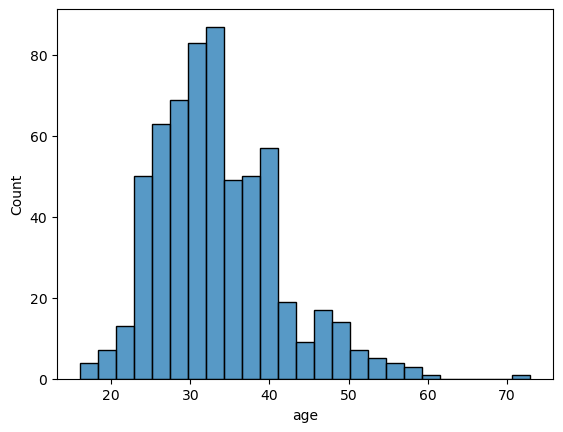

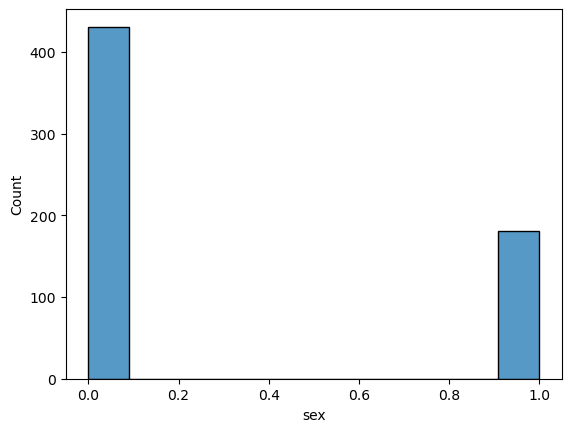

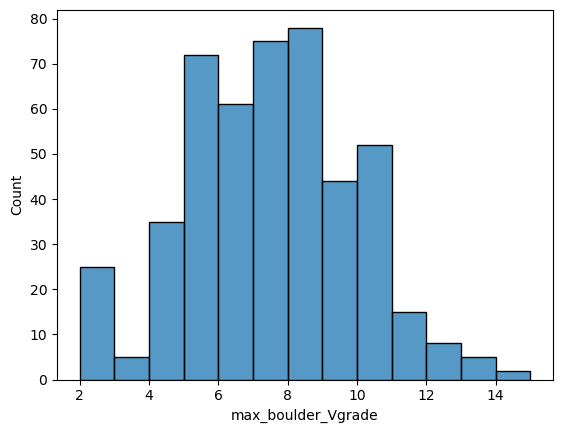

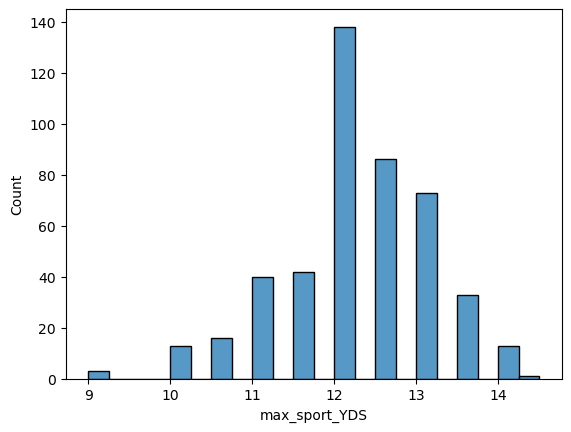

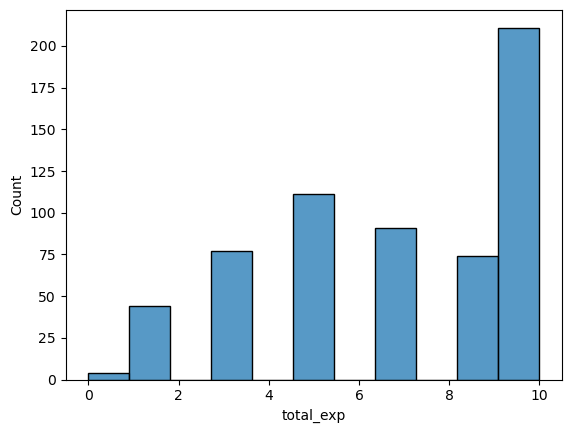

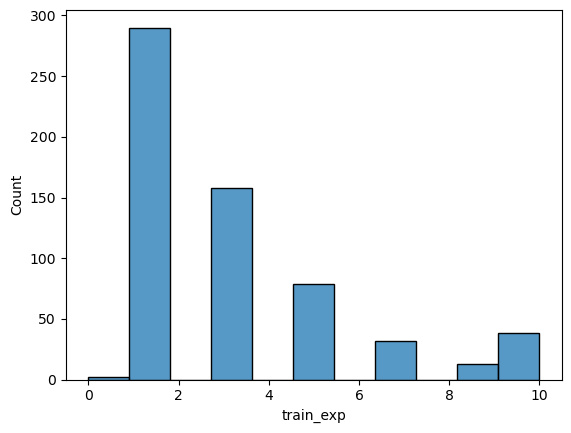

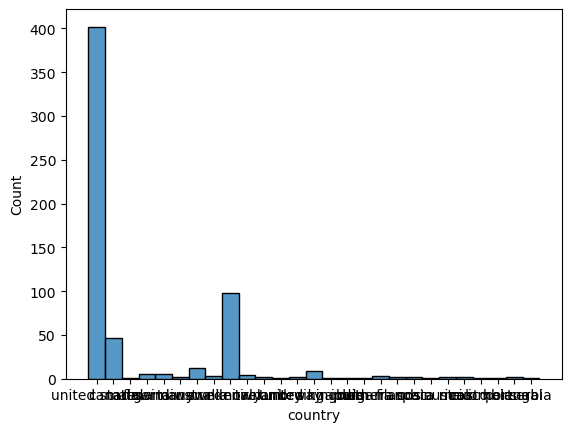

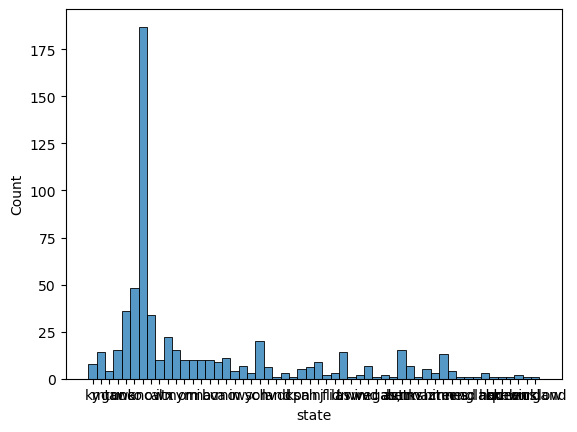

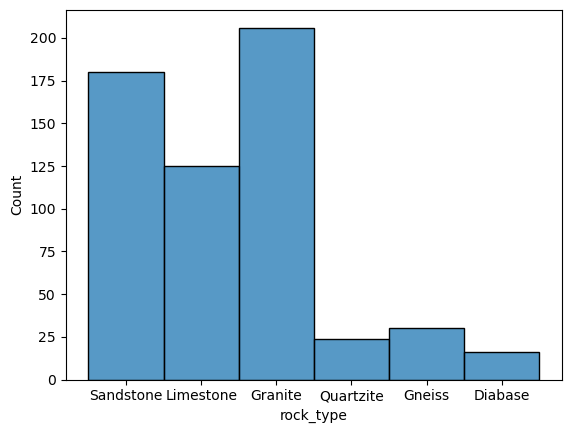

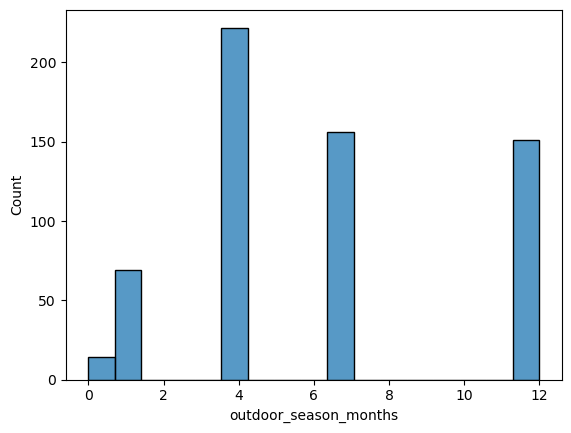

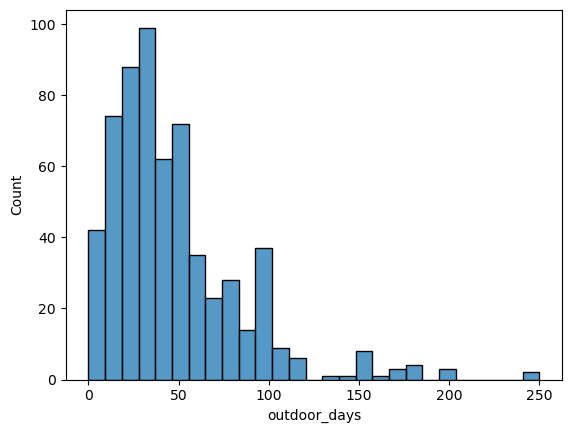

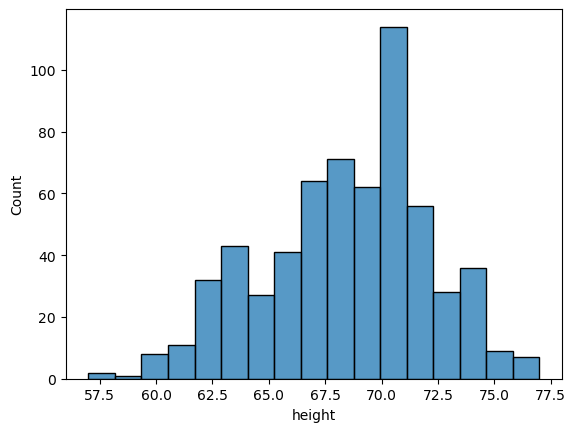

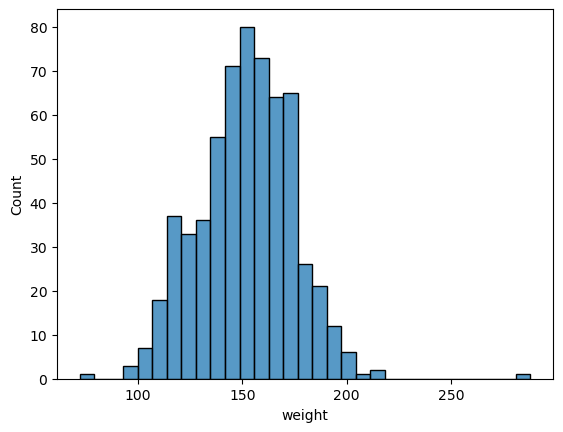

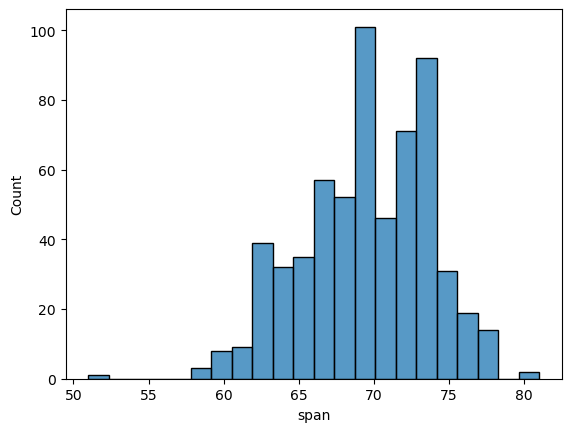

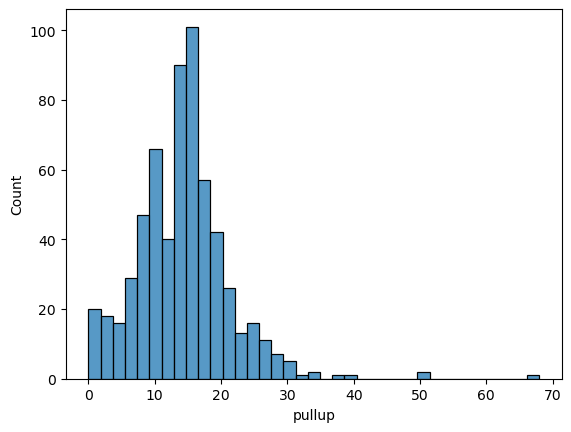

In [4]:
#Plot histograms to check variable distribution and outliers
for i, col in enumerate(df.columns[0:15]):
    plt.figure(i)
    sns.histplot(df[col])

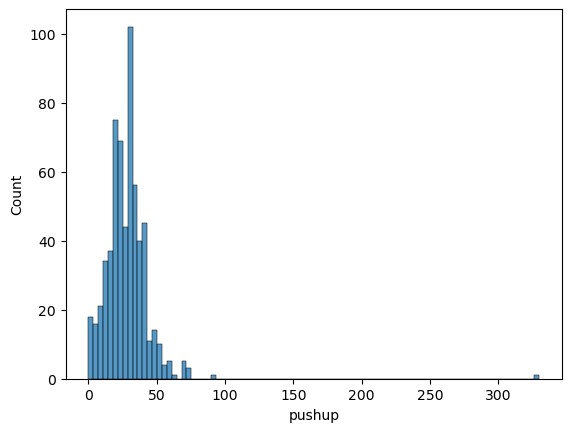

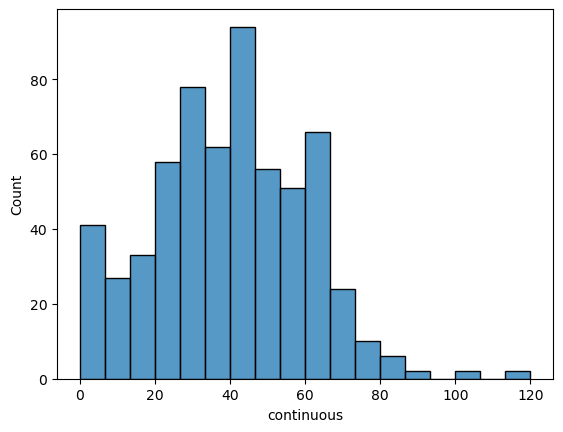

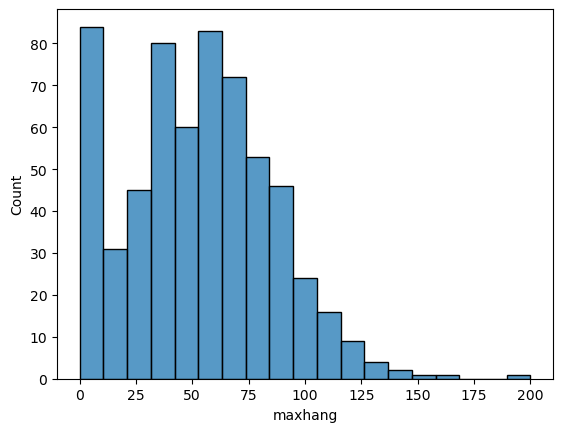

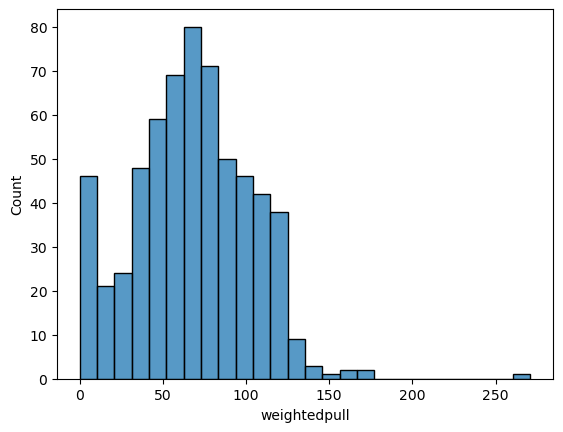

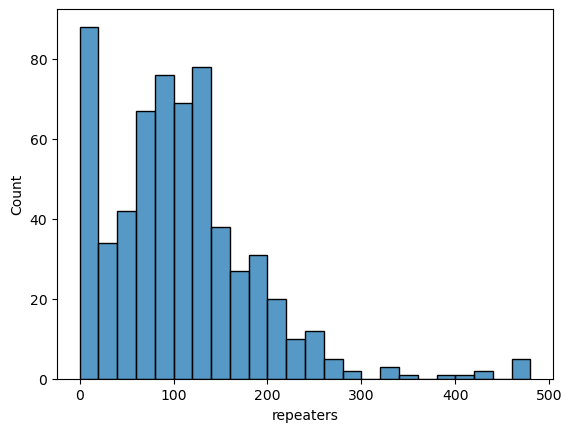

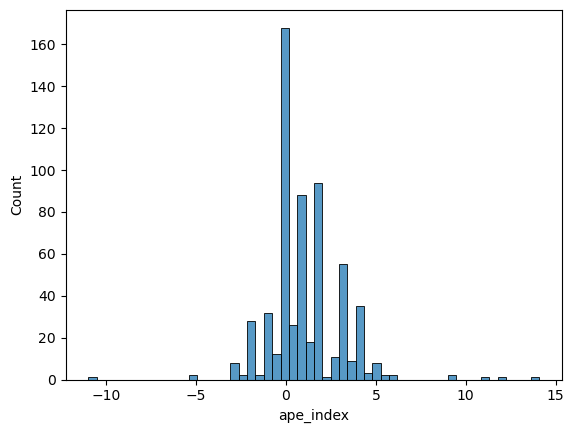

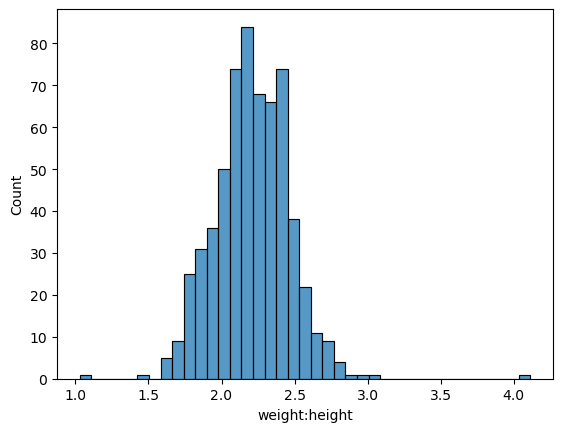

In [5]:
for i, col in enumerate(df.columns[15:]):
    plt.figure(i)
    sns.histplot(df[col])

Text(0.5, 1.0, '# of Climbers by Age and Gender')

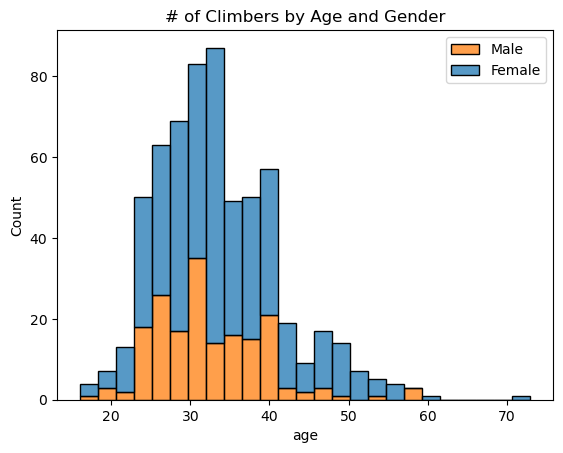

In [6]:
#Several bivariate histograms to better understand the population
sns.histplot(data=df, x='age', hue='sex', multiple='stack')
plt.legend(labels=['Female','Male'])
plt.title('# of Climbers by Age and Gender')

Text(0.5, 1.0, '# of Climbers by Max Sport and Max Boulder Grades')

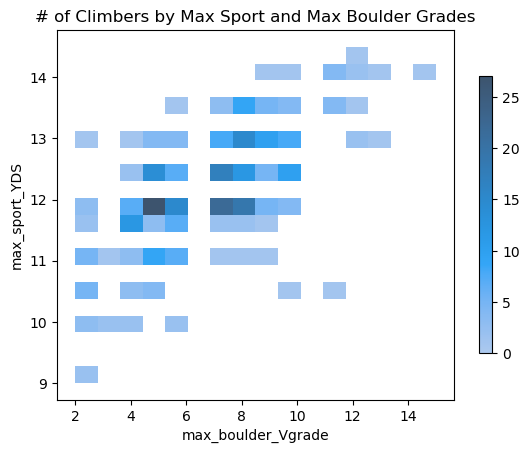

In [7]:
sns.histplot(data=df, x='max_boulder_Vgrade', y='max_sport_YDS', cbar=True, cbar_kws=dict(shrink=.75))
plt.title('# of Climbers by Max Sport and Max Boulder Grades')

Text(0.5, 1.0, '# of Climbers by Length of Outdoor Season and Outdoor Days')

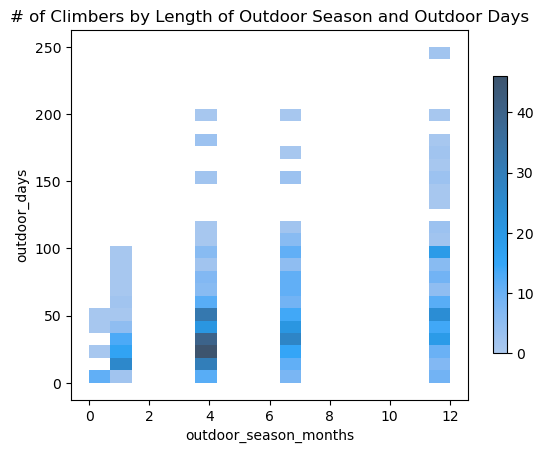

In [8]:
sns.histplot(data=df, x='outdoor_season_months', y='outdoor_days',cbar=True, cbar_kws=dict(shrink=.75))
plt.title('# of Climbers by Length of Outdoor Season and Outdoor Days')

Text(0.5, 1.0, 'Correlation Heatmap Between Numerical Variables')

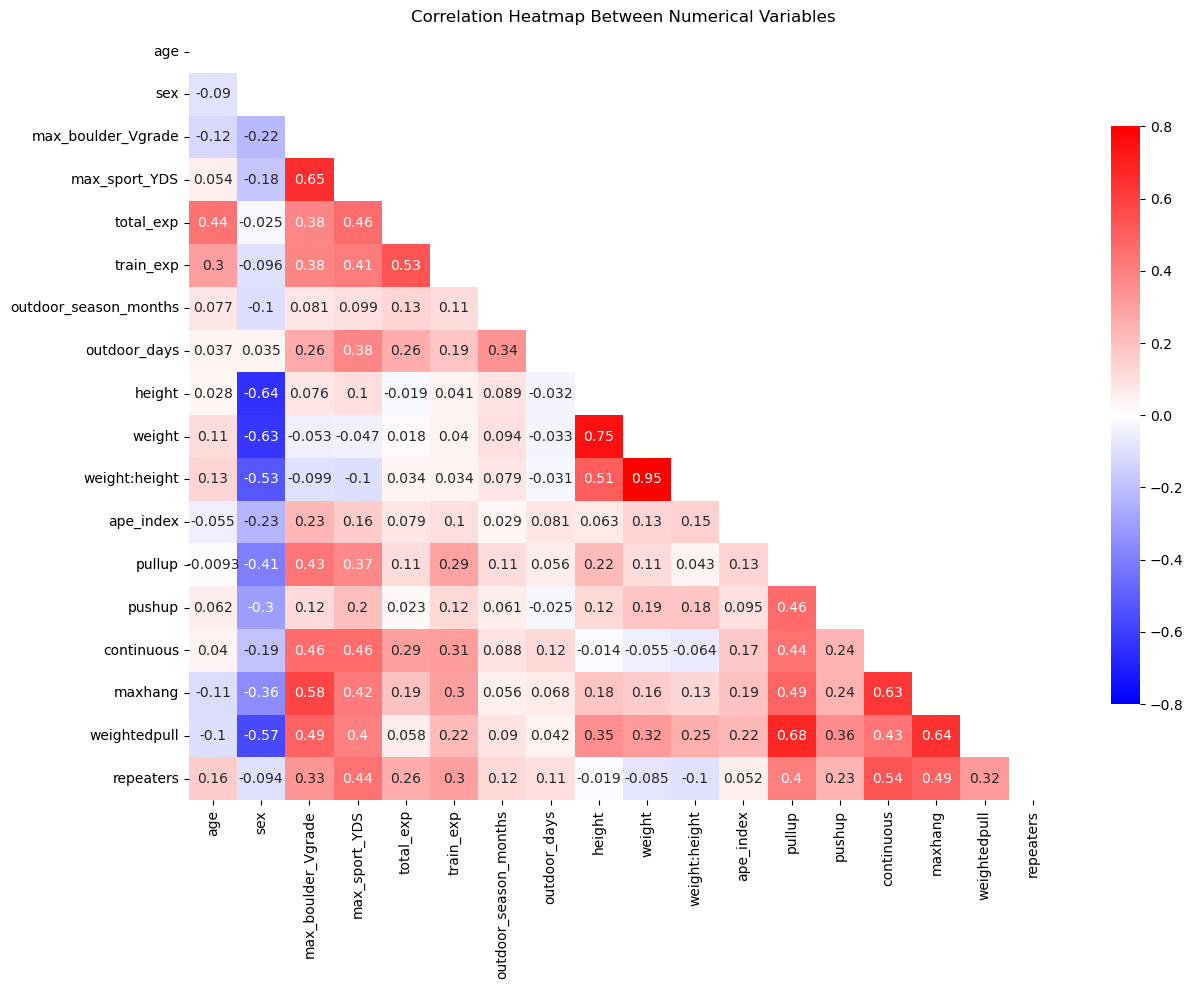

In [9]:
#corrleation heatmap between numerical variables within the dataset
plt.figure(figsize=(14, 10))
num_df=df[['age','sex','max_boulder_Vgrade','max_sport_YDS','total_exp','train_exp','outdoor_season_months','outdoor_days','height','weight','weight:height','ape_index','pullup','pushup','continuous', 'maxhang', 'weightedpull', 'repeaters']]
mask = np.triu(np.ones_like(num_df.corr(), dtype=bool))
sns.heatmap(num_df.corr(), mask=mask, cmap='bwr',vmin=-0.8, vmax=0.8, cbar_kws=dict(shrink=.75), annot=True)
plt.title('Correlation Heatmap Between Numerical Variables')


In [10]:
#Perform Variance Inflation Factor (VIF) to identify any multicollnearity of features
for (columnname, columndata) in df.items():
    print(columnname, columndata.isnull().sum())

from statsmodels.stats.outliers_influence import variance_inflation_factor 
features=['age','sex','total_exp','train_exp','outdoor_season_months','outdoor_days','height','weight:height','ape_index','pullup','pushup','continuous', 'maxhang', 'weightedpull', 'repeaters']
df_vif=df[features]
vif_data=pd.DataFrame()
vif_data['features']=features
vif_data['VIF']=[variance_inflation_factor(df_vif.values, i) 
                          for i in range(len(df_vif.columns))] 

display(vif_data)

age 0
sex 0
max_boulder_Vgrade 135
max_sport_YDS 154
total_exp 0
train_exp 0
country 0
state 0
rock_type 31
outdoor_season_months 0
outdoor_days 0
height 0
weight 0
span 0
pullup 0
pushup 0
continuous 0
maxhang 0
weightedpull 0
repeaters 0
ape_index 0
weight:height 0


,features,VIF
0,age,28.420182
1,sex,2.109253
2,total_exp,10.960655
3,train_exp,3.684824
4,outdoor_season_months,4.465134
5,outdoor_days,3.115577
6,height,142.893389
7,weight:height,120.713308
8,ape_index,1.437158
9,pullup,11.971239


In [11]:
#drop height and age due to high multicollinearity with other features
reduced_features=['sex','total_exp','train_exp','outdoor_season_months','outdoor_days','weight:height','ape_index','pullup','pushup','continuous', 'maxhang', 'weightedpull', 'repeaters']
df_vif=df[reduced_features]
vif_data=pd.DataFrame()
vif_data['features']=reduced_features
vif_data['VIF']=[variance_inflation_factor(df_vif.values, i) 
                          for i in range(len(df_vif.columns))] 

display(vif_data)

,features,VIF
0,sex,1.837547
1,total_exp,9.525246
2,train_exp,3.591965
3,outdoor_season_months,4.446419
4,outdoor_days,3.094983
5,weight:height,14.492639
6,ape_index,1.421265
7,pullup,11.289330
8,pushup,4.605009
9,continuous,9.369571


Average R2 Score : 0.48967007618078173


Text(0.5, 1.0, 'Boulder Grade Regression Coefficients')

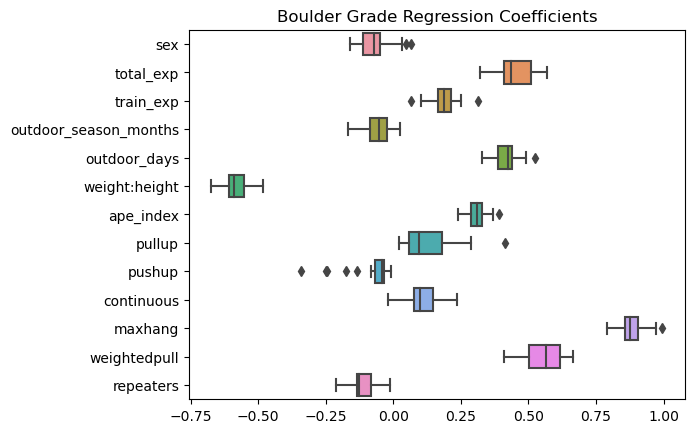

In [12]:
#multiple linear regressions for boulder_grade and sport_grade
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

df_boulder_regression=df.dropna(subset=['max_boulder_Vgrade'])
features=['sex','total_exp','train_exp','outdoor_season_months','outdoor_days','weight:height','ape_index','pullup','pushup','continuous', 'maxhang', 'weightedpull', 'repeaters']
x=df_boulder_regression.loc[:,features].values
y=df_boulder_regression['max_boulder_Vgrade']

boulder_model=make_pipeline(StandardScaler(), LinearRegression())
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=15)
boulder_model.fit(x_train, y_train)

boulder_cv_model = cross_validate(
    boulder_model,
    x,
    y,
    cv=RepeatedKFold(n_splits=5, n_repeats=5),
    return_estimator=True,
    n_jobs=2,
)

print("Average R2 Score :", boulder_cv_model['test_score'].mean())

boulder_coefs=pd.DataFrame((x[1].coef_ for x in boulder_cv_model['estimator']), columns=features)


sns.boxplot(data=boulder_coefs, orient='h')
plt.title('Boulder Grade Regression Coefficients')


Average R2 Score : 0.4871480789900165


Text(0.5, 1.0, 'Sport Grade Regression Coefficients')

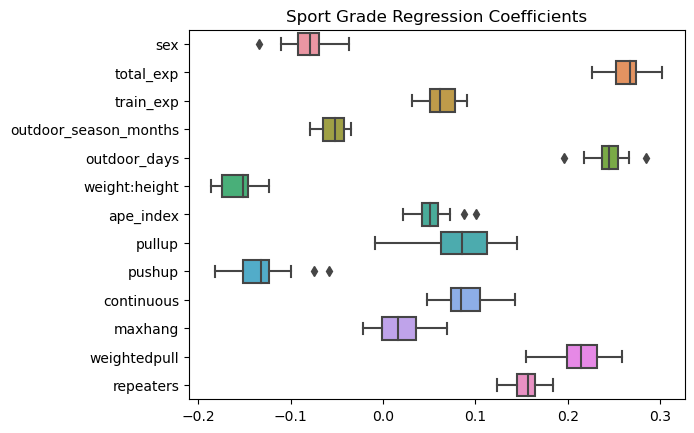

In [14]:
df_sport_regression=df.dropna(subset=['max_sport_YDS'])
features=['sex','total_exp','train_exp','outdoor_season_months','outdoor_days','weight:height','ape_index','pullup','pushup','continuous', 'maxhang', 'weightedpull', 'repeaters']
x=df_sport_regression.loc[:,features].values
y=df_sport_regression['max_sport_YDS']

sport_model=make_pipeline(StandardScaler(), LinearRegression())
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=10)
sport_model.fit(x_train, y_train)

sport_cv_model = cross_validate(
    sport_model,
    x,
    y,
    cv=RepeatedKFold(n_splits=5, n_repeats=5),
    return_estimator=True,
    n_jobs=2,
)

print("Average R2 Score :", sport_cv_model['test_score'].mean())
sport_coefs=pd.DataFrame((x[1].coef_ for x in sport_cv_model['estimator']), columns=features)

sns.boxplot(data=sport_coefs, orient='h')
plt.title('Sport Grade Regression Coefficients')